### Keertana V. Chidambaram 

#### Pandas 1

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Problem 1
a = pd.Series([(2 * i) ** 2 - 1 for i in range(26)], index=[2 * i for i in range(26)])
print(a)

0       -1
2        3
4       15
6       35
8       63
10      99
12     143
14     195
16     255
18     323
20     399
22     483
24     575
26     675
28     783
30     899
32    1023
34    1155
36    1295
38    1443
40    1599
42    1763
44    1935
46    2115
48    2303
50    2499
dtype: int64


In [3]:
change = [i for i in a.index if i % 3 == 0]
a[change] = 0
print(a)

0        0
2        3
4       15
6        0
8       63
10      99
12       0
14     195
16     255
18       0
20     399
22     483
24       0
26     675
28     783
30       0
32    1023
34    1155
36       0
38    1443
40    1599
42       0
44    1935
46    2115
48       0
50    2499
dtype: int64


In [4]:
# Problem 2
from scipy.stats import bernoulli
import matplotlib.pyplot as plt

def generator(p, d=100):
    dates = pd.date_range("1/1/2000", "12/31/2000", freq='D')
    change = pd.Series([0] + list(bernoulli.rvs(p, size=len(dates)-1)*2 - 1))
    data = change.cumsum() + d
    data.index = dates
    data[data < 0] = 0
    data.plot()
    plt.show()    

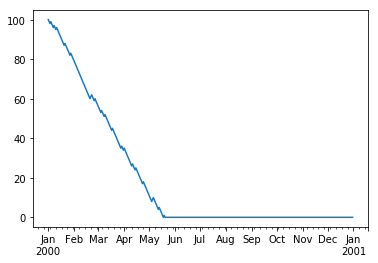

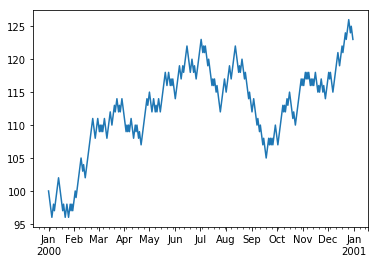

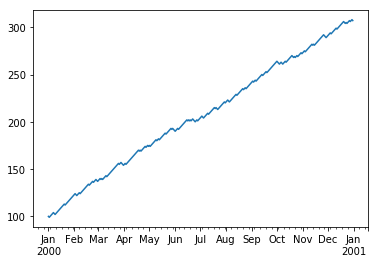

In [5]:
generator(p=0.2, d=100)
generator(p=0.5, d=100)
generator(p=0.8, d=100)

In [6]:
# Problem 3
name = ['Mylan', 'Regan', 'Justin', 'Jess', 'Jason', 'Remi', 'Matt', 'Alexander', 'JeanMarie']
sex = ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'F']
age = [20, 21, 18, 22, 19, 20, 20, 19, 20]
rank = ['Sp', 'Se', 'Fr', 'Se', 'Sp', 'J', 'J', 'J', 'Se']
ID = range(9)
aid = ['y', 'n', 'n', 'y', 'n', 'n', 'n', 'y', 'n']
GPA = [3.8, 3.5, 3.0, 3.9, 2.8, 2.9, 3.8, 3.4, 3.7]
mathID = [0, 1, 5, 6, 3]
mathGd = [4.0, 3.0, 3.5, 3.0, 4.0]
major = ['y', 'n', 'y', 'n', 'n']
studentInfo = pd.DataFrame({'ID': ID, 'Name': name, 'Sex': sex, 'Age': age,'Class': rank})
otherInfo = pd.DataFrame({'ID': ID, 'GPA': GPA, 'Financial_Aid': aid})
mathInfo = pd.DataFrame({'ID': mathID, 'Grade': mathGd, 'Math_Major': major})

In [7]:
studentInfo[['ID', 'Name']][(studentInfo['Age'] > 19) & (studentInfo['Sex'] == 'M')]

,ID,Name
0,0,Mylan
6,6,Matt


In [8]:
# Problem 4
b = pd.merge(studentInfo[studentInfo['Sex']=='M'], otherInfo, on='ID')[['ID', 'Age', 'GPA']]
b

,ID,Age,GPA
0,0,20,3.8
1,2,18,3.0
2,4,19,2.8
3,6,20,3.8
4,7,19,3.4


#### Pandas 2

In [22]:
from pydataset import data
data1 = data('titanic')
data2 = data('trees')

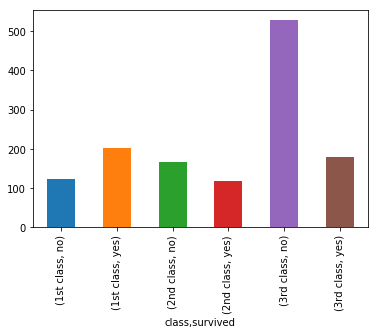

In [47]:
# data1
data1.groupby(['class', 'survived']).size().plot(kind='bar')

Chances of survival steadily decreases with the passenger's class. The higher the class, more the chances of survival.

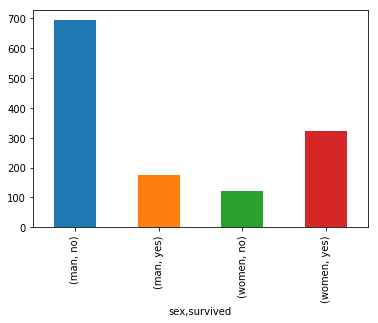

In [48]:
data1.groupby(['sex', 'survived']).size().plot(kind='bar')

Women were more likely to survive than men.

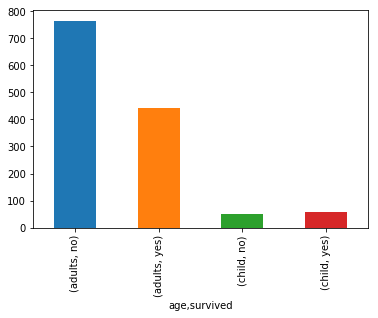

In [49]:
data1.groupby(['age', 'survived']).size().plot(kind='bar')

Children were more likely to survive than adults.

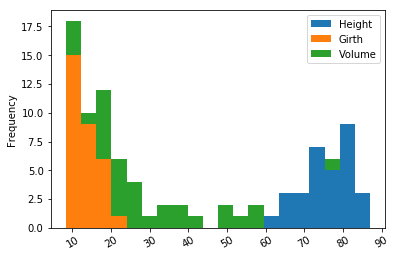

In [50]:
# data2
data2.plot(kind="hist", y=["Height", "Girth", "Volume"], bins=20, stacked=True, rot=30)

The disribution of girth and volume is skewed right and height is skewed left.

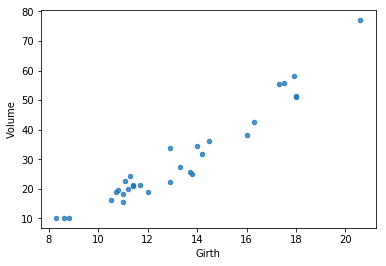

In [52]:
data2.plot(kind="scatter", x="Girth", y="Volume", alpha=.8)

Tree volume is directly proportional to its girth.

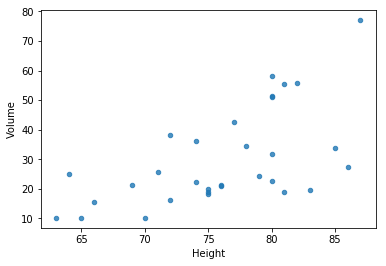

In [53]:
data2.plot(kind="scatter", x="Height", y="Volume", alpha=.8)

Height and volume are not correlated.

#### Pandas 3

In [74]:
iris = data('iris')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001BEE0C98390>,
      dtype=object)

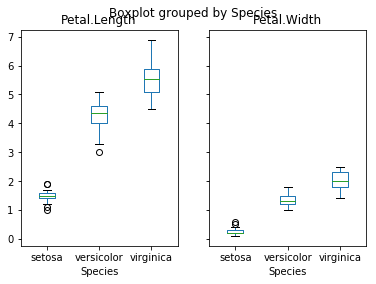

In [79]:

iris.boxplot(["Petal.Length", "Petal.Width"], by="Species", grid=False)

Setosa is s is easiest to distinguish from the others because both its petal length and width are always smaller than others.

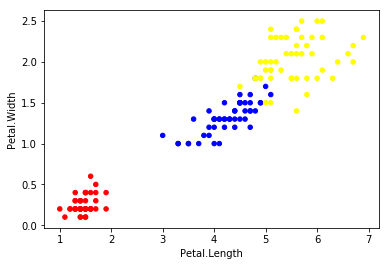

In [76]:
cmap = {'setosa': 'red', 'versicolor': 'blue', 'virginica': 'yellow'}
iris.plot(x='Petal.Length', y='Petal.Width', kind='scatter', c=[cmap.get(c, 'black') for c in iris.Species])

Setosa can be identified from petal length and width. Versicolor and Virginica can be identified by a combination of its petal width and length. As shown in the graph above, if the point lies in the yellow region, it is Virginica and if it is in the blue region it is versicolor.

In [77]:
poisons = data('poisons')

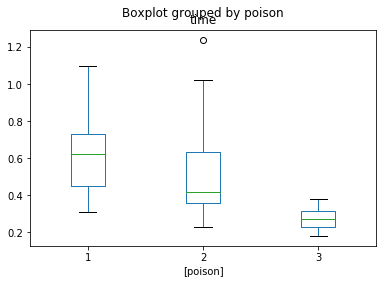

In [82]:
poisons.boxplot(["time"], by=["poison"], grid=False)

Poison 1 is the most deadliest.

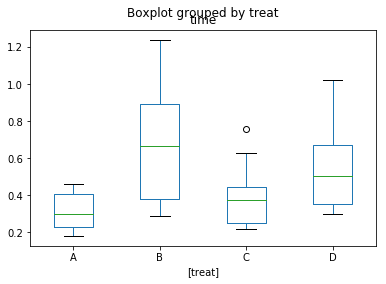

In [83]:
poisons.boxplot(["time"], by=["treat"], grid=False)

A is the most effective treatment.

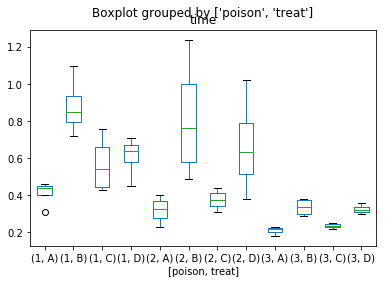

In [84]:
poisons.boxplot(["time"], by=["poison", "treat"], grid=False)

A consistently treats all poisons with a better time than other treatments, so A is the preferred choice. Even if the poison was known, A is the best choice.

In [85]:
diamonds = data('diamonds')
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


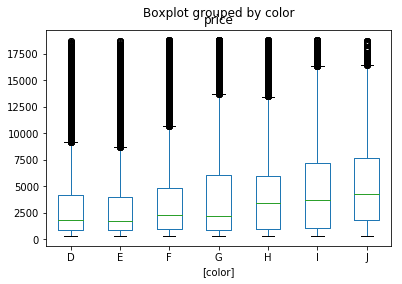

In [92]:
diamonds.boxplot(["price"], by=["color"], grid=False)

It looks like price somewhat increases with change in color from 'D' to 'J'. Although there is significant overlap.

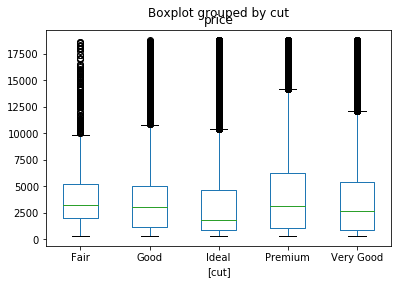

In [93]:
diamonds.boxplot(["price"], by=["cut"], grid=False)

There is significant overlap for distributions of each cut, it looks like the effect of cut on price is not very significant.

In [97]:
diamonds_h = diamonds[diamonds['color']=='H']

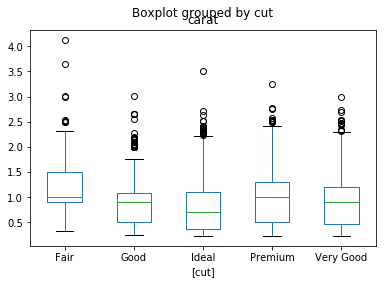

In [99]:
diamonds_h.boxplot(["carat"], by=["cut"], grid=False)

Among diamonds of 'H' color, 'fair' cut on an average has a higher carat than an 'ideal' cut, which explains the higher price.

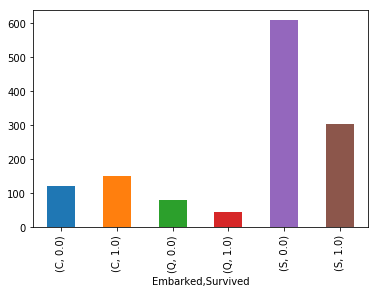

Embarked  Survived
C         0.0         0.444444
          1.0         0.555556
Q         0.0         0.642276
          1.0         0.357724
S         0.0         0.667396
          1.0         0.332604
dtype: float64

In [120]:
# Problem 2
titanic = pd.read_csv('titanic.csv')
titanic.groupby(['Embarked', 'Survived']).size().plot(kind='bar')
plt.show()
titanic.groupby(['Embarked', 'Survived']).size() / titanic.groupby(['Embarked']).size()

Survival rate: C > Q ~ S

In [121]:
titanic.pivot_table(values="Survived", index=["Embarked", "Sex"], aggfunc="sum") / \
    titanic.pivot_table(values="Survived", index=["Embarked", "Sex"], aggfunc="count")

Survived
Embarked Sex             
C        female  0.902655
         male    0.305732
Q        female  0.616667
         male    0.111111
S        female  0.680412
         male    0.170144

Survival rate for women is consistently better than men. Both cases we see that survival rate C > Q ~ S for both genders. The first guess is that passengers from C are wealthier than passengers from Q or S.

In [123]:
titanic.pivot_table(values="Survived", index=["Embarked", "Pclass"], aggfunc="sum") / \
    titanic.pivot_table(values="Survived", index=["Embarked", "Pclass"], aggfunc="count")

Survived
Embarked Pclass          
C        1.0     0.687943
         2.0     0.571429
         3.0     0.366337
Q        1.0     0.666667
         2.0     0.285714
         3.0     0.353982
S        1.0     0.559322
         2.0     0.417355
         3.0     0.210101

Clearly higher the class, higher the survival rate.

In [128]:
titanic.pivot_table(values="Name", index=["Embarked", "Pclass"], aggfunc="count") / \
    titanic.pivot_table(values="Name", index=["Embarked"], aggfunc="count") 

Name
Embarked Pclass          
C        1.0     0.522222
         2.0     0.103704
         3.0     0.374074
Q        1.0     0.024390
         2.0     0.056911
         3.0     0.918699
S        1.0     0.193654
         2.0     0.264770
         3.0     0.541575

Clearly, most of the first class passengers embarked from 'C'.

#### Pandas 4

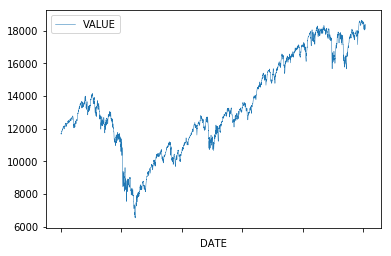

In [139]:
# Problem 1
djia = pd.read_csv('DJIA.csv', index_col='DATE', na_values='.')
djia.dropna(inplace=True)
djia.astype(float)
djia.plot(y='VALUE', kind='line', lw=0.5)

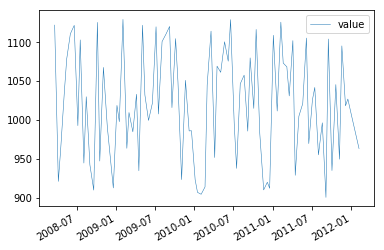

In [162]:
# Problem 2
paychecks = pd.read_csv('paychecks.csv', header=None, names=['value'])
d1 = pd.date_range(start='3/13/2008 00:00', periods=46, freq="WOM-3FRI")
d2 = pd.date_range(start='3/13/2008 00:00', periods=47, freq="WOM-1MON")
dates = d1.union(d2)
paychecks.index = dates
paychecks.plot(y='value', kind='line', lw=0.5)

In [241]:
# Problem 5
djia.index = pd.to_datetime(djia.index)
del_vals = djia - djia.shift(1)
print('single day with the largest gain:')
print((del_vals).max())
print((del_vals).idxmax())
print('single day with the largest loss:')
print((del_vals).min())
print((del_vals).idxmin())

single day with the largest gain:
VALUE    936.42
dtype: float64
VALUE   2008-10-13
dtype: datetime64[ns]
single day with the largest loss:
VALUE   -777.68
dtype: float64
VALUE   2008-09-29
dtype: datetime64[ns]


In [244]:
first_val = djia.sort_index().resample("M").apply(lambda ser: ser.iloc[-1,])
last_val = djia.sort_index().resample("M").apply(lambda ser: ser.iloc[0,])
del_vals = last_val - first_val
print('month with the largest gain:')
print((del_vals).max())
print((del_vals).idxmax())
print('month with the largest loss:')
print((del_vals).min())
print((del_vals).idxmin())

month with the largest gain:
VALUE    1506.06
dtype: float64
VALUE   2008-10-31
dtype: datetime64[ns]
month with the largest loss:
VALUE   -1391.53
dtype: float64
VALUE   2015-10-31
dtype: datetime64[ns]


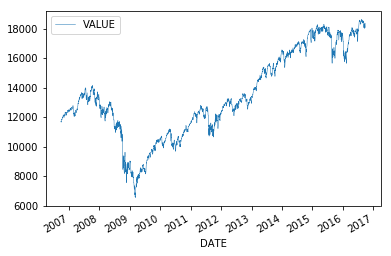

In [288]:
# Problem 6
djia.plot(lw=0.5)
plt.legend()
plt.show()

Text(0.5, 1.0, 'Rolling Average')

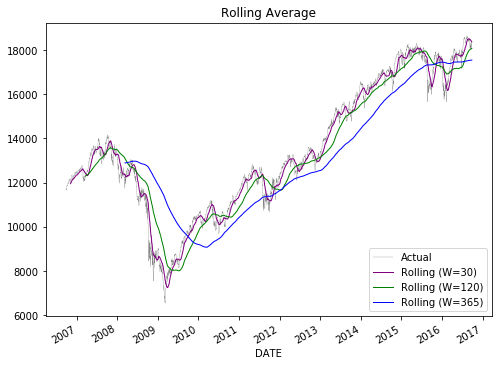

In [289]:
w1 = 30
w2 = 120
w3 = 365
f = plt.subplots(2,2,figsize=(8,6))

ax1 = plt.subplot(111)
djia.plot(color="grey", lw=.3, ax=ax1)
djia.rolling(window=w1).mean().plot(color='purple', lw=1, ax=ax1)
djia.rolling(window=w2).mean().plot(color='g', lw=1, ax=ax1)
djia.rolling(window=w3).mean().plot(color='b', lw=1, ax=ax1)
ax1.legend(["Actual", "Rolling (W=30)", "Rolling (W=120)", "Rolling (W=365)"], loc="lower right")
ax1.set_title("Rolling Average")

Text(0.5, 1.0, 'EWMA')

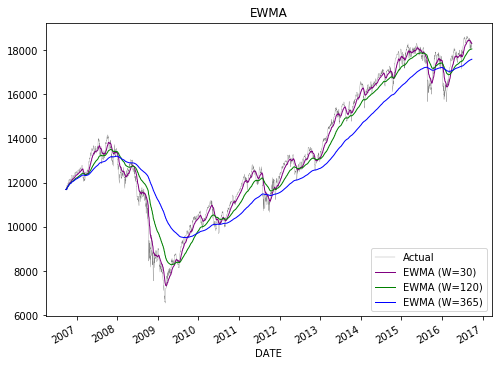

In [291]:
f = plt.subplots(2,2,figsize=(8,6))
ax1 = plt.subplot(111)
djia.plot(color="grey", lw=.3, ax=ax1)
djia.ewm(span=w1).mean().plot(color='purple', lw=1, ax=ax1)
djia.ewm(span=w2).mean().plot(color='g', lw=1, ax=ax1)
djia.ewm(span=w3).mean().plot(color='b', lw=1, ax=ax1)
ax1.legend(["Actual", "EWMA (W=30)", "EWMA (W=120)", "EWMA (W=365)"], loc="lower right")
ax1.set_title("EWMA")

Text(0.5, 1.0, 'Rolling Minimum')

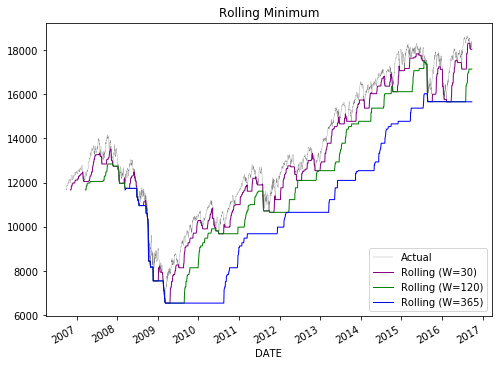

In [292]:
f = plt.subplots(2,2,figsize=(8,6))
ax1 = plt.subplot(111)
djia.plot(color="grey", lw=.3, ax=ax1)
djia.rolling(window=w1).min().plot(color='purple', lw=1, ax=ax1)
djia.rolling(window=w2).min().plot(color='g', lw=1, ax=ax1)
djia.rolling(window=w3).min().plot(color='b', lw=1, ax=ax1)
ax1.legend(["Actual", "Rolling (W=30)", "Rolling (W=120)", "Rolling (W=365)"], loc="lower right")
ax1.set_title("Rolling Minimum")

Text(0.5, 1.0, 'Rolling Maximum')

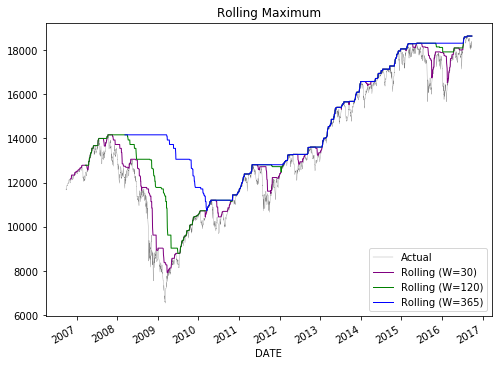

In [293]:
f = plt.subplots(2,2,figsize=(8,6))
ax1 = plt.subplot(111)
djia.plot(color="grey", lw=.3, ax=ax1)
djia.rolling(window=w1).max().plot(color='purple', lw=1, ax=ax1)
djia.rolling(window=w2).max().plot(color='g', lw=1, ax=ax1)
djia.rolling(window=w3).max().plot(color='b', lw=1, ax=ax1)
ax1.legend(["Actual", "Rolling (W=30)", "Rolling (W=120)", "Rolling (W=365)"], loc="lower right")
ax1.set_title("Rolling Maximum")

Larger windows give a less approximate but smoother curve